In [3]:
### importing neccessary libraries 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  
import pandas as pd   
from scipy import stats
plt.style.use("fivethirtyeight")

In [4]:
## laoding the dataset  
ab_test_df = pd.read_csv(r"D:\datasets\archive(1)\ab_test_click_data (1).csv")
## checking the first five items  
ab_test_df.head()

,user_id,click,group,timestamp
0,1,1,exp,2024-01-01 00:00:00
1,2,0,exp,2024-01-01 00:01:00
2,3,1,exp,2024-01-01 00:02:00
3,4,0,exp,2024-01-01 00:03:00
4,5,1,exp,2024-01-01 00:04:00


In [5]:
## checking the number of rows  
ab_test_df.shape

(20000, 4)

In [6]:
## checking for the general info 
ab_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    20000 non-null  int64 
 1   click      20000 non-null  int64 
 2   group      20000 non-null  object
 3   timestamp  10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 625.1+ KB


In [7]:
## checking for missing values  
ab_test_df.isnull().sum()

user_id          0
click            0
group            0
timestamp    10000
dtype: int64

In [8]:
## checking for descriptive stats  
ab_test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,20000.0,10000.50000,5773.647028,1.0,5000.75,10000.5,15000.25,20000.0
click,20000.0,0.40525,0.490953,0.0,0.00,0.0,1.00,1.0


In [9]:
## Checking the unique counts in group  
ab_test_df.group.unique()

array(['exp', 'con'], dtype=object)

In [10]:
## checking for the value counts  
ab_test_df['group'].value_counts()

group
exp    10000
con    10000
Name: count, dtype: int64

In [11]:
## checking the counts  
ab_test_df.groupby('group').sum()['click']

group
con    1989
exp    6116
Name: click, dtype: int64

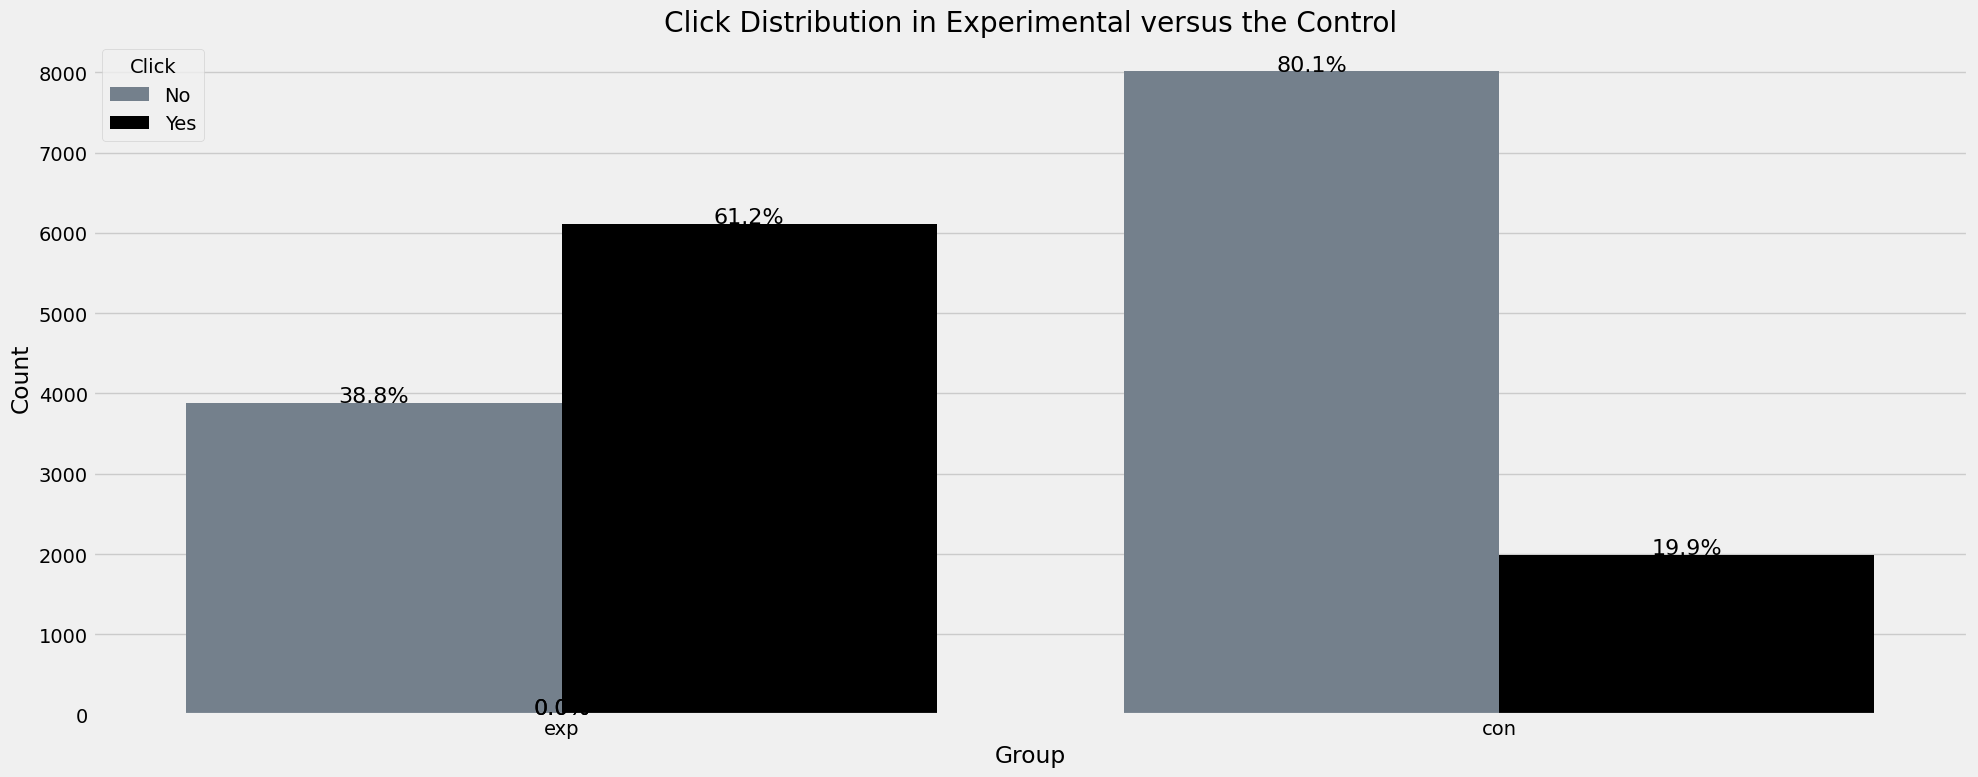

In [12]:
## Bar chart 
pallette = {0:"SlateGray",1:"black"}
fig , ax = plt.subplots(figsize=(20,8))
sns.countplot(x='group',hue='click',data=ab_test_df,palette=pallette)
plt.title("Click Distribution in Experimental versus the Control")
plt.xlabel("Group")
plt.ylabel("Count")
plt.legend(title='Click',labels=['No','Yes'],loc='upper left')

## calculate the group counts  
group_counts = ab_test_df.groupby(['group']).size()
group_click_counts = ab_test_df.groupby(['group','click']).size().reset_index(name='count')
for i, p in enumerate(ax.patches):
    group = 'exp' if i < len(ax.patches)//2 else 'con'
    click = 0 if i % 2 == 0 else 1
    height = p.get_height()
    total = group_counts[group]
    percentage = (height / total) * 100
    ax.text(p.get_x() + p.get_width() / 2., height + 10, f'{percentage:.1f}%', ha='center', color='black', fontsize=16)

plt.tight_layout()
plt.subplots_adjust()
plt.show()


### Parameters of the Model for Power Analysis

In [13]:
## parameters of the model for power analysis  
alpha = 0.05 
print("Alpha: Significance level is",alpha)

## Minimum Detecatble Effect  
delta = 0.1
print("Delta: Minimum Dectable Effect is",delta)

Alpha: Significance level is 0.05
Delta: Minimum Dectable Effect is 0.1


#### calculating the total number of clicks per group by summing clicks

In [ ]:
## total number of clicks made by control group
X_con = ab_test_df.groupby('group')['click'].sum().loc["con"]
## total number of clicks made by expirmental group
X_exp = ab_test_df.groupby('group')['click'].sum().loc["exp"]
## print  
print("Number of clicks in exp and control",ab_test_df.groupby('group')['click'].sum().reset_index())
print("Number of clicks in control:",ab_test_df.groupby('group')['click'].sum().loc["con"])
print("Number of clicks in exp:",ab_test_df.groupby('group')['click'].sum().loc["exp"])
## total number of users in control  
N_con = ab_test_df[ab_test_df['group']=="con"]['group'].count()
## total number of users in control
N_exp = ab_test_df[ab_test_df['group']=="exp"]['group'].count()
print("Number of userss in the control is",N_con)
print("Number of users in the experimental",N_exp)

Number of clicks in exp and control   group  click
0   con   1989
1   exp   6116
Number of clicks in control: 1989
Number of clicks in exp: 6116
Number of userss in the control is 10000
Number of users in the experimental 10000


##### calculating the Pooled Probability

In [ ]:

## Click Through Rate forr Control group
p_con_hat = X_con/N_con
## Click Through Rate for ExpiremtL GROUP
p_exp_hat = X_exp /N_exp
print("Click Probability in Control",p_con_hat)
print("Click Probability in exp",p_exp_hat)
## calculating the pooled probability or over all proabililty in exp and control
p_pooled_hat = (X_con + X_exp)/(N_con + N_exp)
print("Click Pooled Probability:",p_pooled_hat)

Click Probability in Control 0.1989
Click Probability in exp 0.6116
Click Pooled Probability: 0.40525


####  calculating the pooled variance

In [16]:
## pooled variance  
pooled_varaince = p_pooled_hat*(1-p_pooled_hat)*(1/N_con + 1/N_exp)
## print()
print("Pooled Probability",p_pooled_hat)
print("pooled variance",pooled_varaince)

Pooled Probability 0.40525
pooled variance 4.82044875e-05


#### calculating the standard  error

In [17]:
## compute the standard Errorr  
SE = np.sqrt(pooled_varaince)
## the standard error is  
print(f"The Standard Error is: {SE:.4f}")
## compute the test statistic for the Z test 
Test_stat = (p_con_hat - p_exp_hat)/SE
print(f"Test statisctic for the 2-sample t test is: {Test_stat:.4f}")

## critical value for the ttest 
Z_critic = stats.norm.ppf(1-alpha/2)
print(f"The Z critical value is :{Z_critic:.2f}")

The Standard Error is: 0.0069
Test statisctic for the 2-sample t test is: -59.4416
The Z critical value is :1.96


##### calculating the p values and the z test

In [18]:
p_value = stats.norm.sf(abs(Test_stat))*2
print(f"The p value is: {p_value}")

The p value is: 0.0


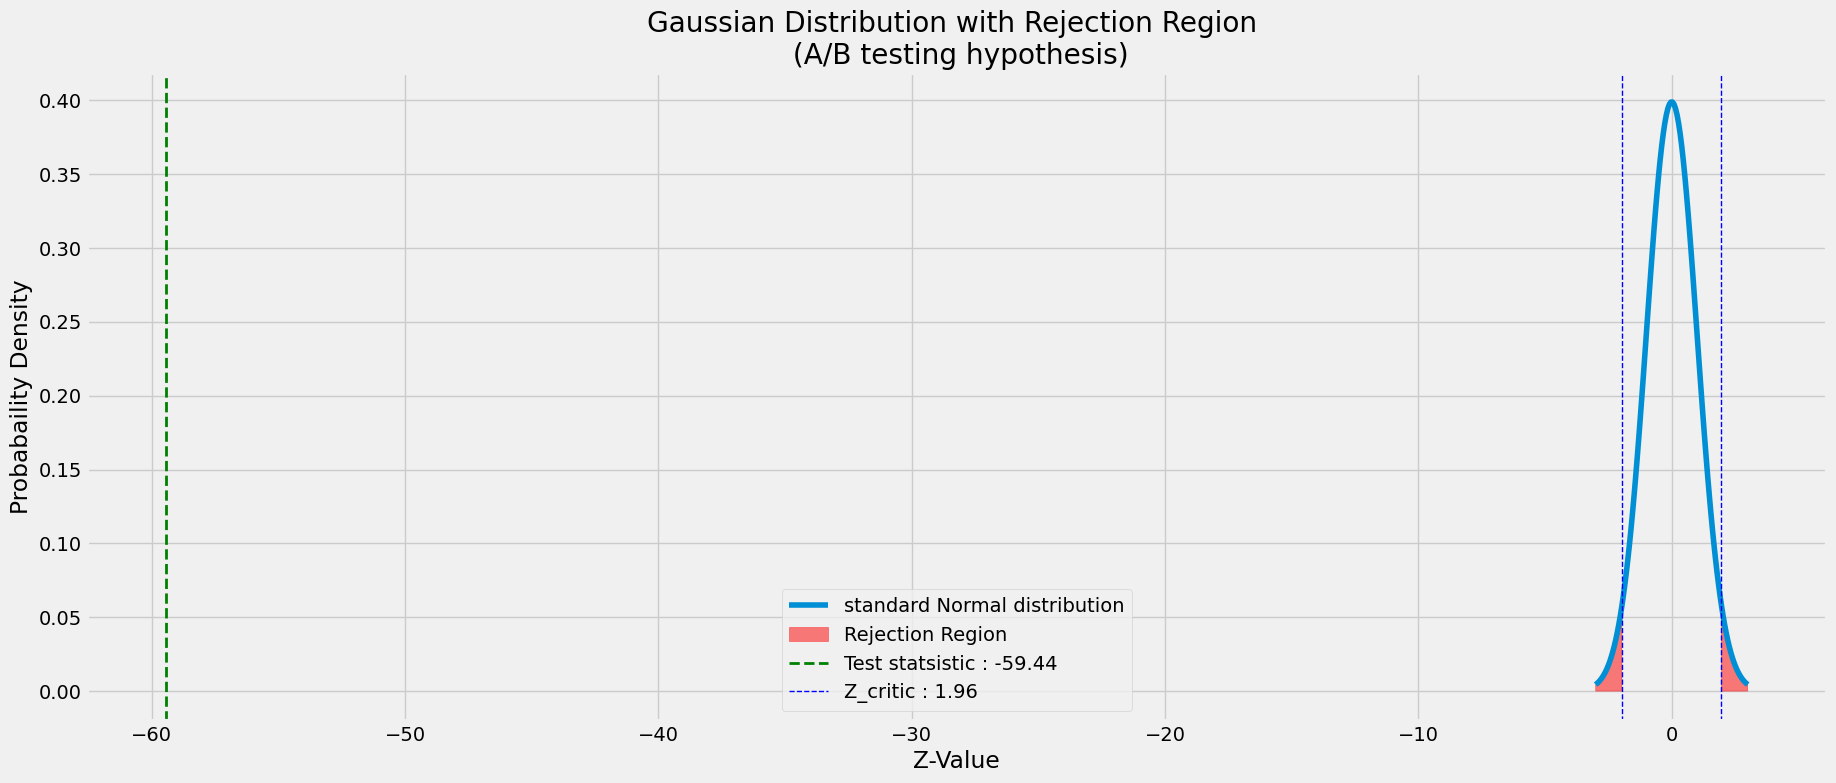

In [19]:
## the parameters of the normal distribution  
plt.figure(figsize=(20,8))
## mean
mu = 0 
## std
sigma = 1 
## x-values
x = np.linspace(mu - 3*sigma , mu + 3*sigma , 100)
## y-coordinates
y = stats.norm.pdf(x,mu,sigma)
## plotting the standard normal distribution  
plt.plot(x,y,label='standard Normal distribution')
## shade the rejection rejion for a two tailed test  
plt.fill_between(x,y,where=(x>Z_critic)|(x<-Z_critic),color='red',alpha=0.5,label='Rejection Region')
## Adding the test statisttic  
plt.axvline(Test_stat , color='green',linestyle='dashed',linewidth=2,label=f"Test statsistic : {Test_stat:.2f}")
## Adding critical Z values      
plt.axvline(Z_critic , color='blue',linestyle='dashed',linewidth=1,label=f"Z_critic : {Z_critic:.2f}")
plt.axvline(-Z_critic , color='blue',linestyle='dashed',linewidth=1)

plt.xlabel("Z-Value")
plt.ylabel("Probabaility Density")
plt.title("Gaussian Distribution with Rejection Region \n (A/B testing hypothesis)")
plt.legend()
plt.show()

##### Calculating Confidence Intervals 

In [ ]:
## calculating the cconfidence intervals  
CI = [ 
    
    float(round((p_exp_hat-p_con_hat)-SE*Z_critic,3)), 
    float(round((p_exp_hat-p_con_hat)+SE*Z_critic,3))

]
print(f"The critical values are :{CI}")

The critical values are :[0.399, 0.426]
